In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class LinearNeuron:

  def __init__(self, n_inputs, learning_rate=0.1):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    Y_est = np.dot(self.w, X) + self.b
    return Y_est

  def fit(self, X, Y, epochs = 50, solver = 'SGD'):
    p = X.shape[1]

    if('SGD' == solver): # Error en linea.
      for _ in range(epochs):
          for i in range(p):
            y_est = self.predict(X[:, i])
            self.w += self.eta * (Y[:, i] - y_est) * X[:, i]
            self.b += self.eta * (Y[:, i] - y_est)
    
    elif('BGD' == solver): # E2.
      for _ in range(epochs):
        Y_est = np.dot(self.w, X) + self.b
        self.w = (self.eta / p) * np.dot((Y - Y_est), X.T).ravel()
        self.b = (self.eta / p) * np.sum(Y - Y_est)

    else:
      pass

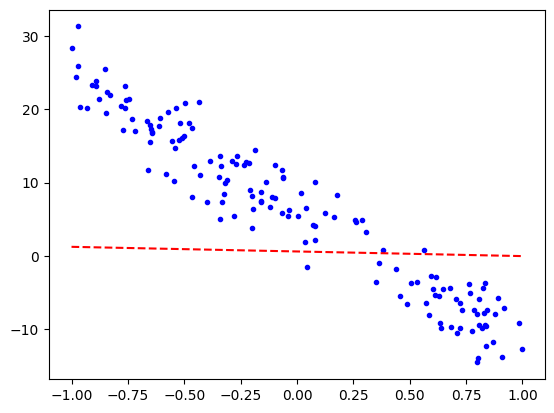

In [ ]:
# Ejemplo
p = 150
# reshape(1,-1) ensures shape = (1, p)
x = -1 + 2 * np.random.rand(p).reshape(1,-1)
# y = -18x + 6 + ( 3 * gaussian noise range(0, 1))
y = -18 * x + 6 + 3 * np.random.randn(p)
plt.plot(x,y,'.b')


neuron = LinearNeuron(1, 0.1)
neuron.fit(x,y, epochs=100, solver = 'SGD')

# Dibujar línea
xn = np.array([[-1, 1]])
plt.plot(xn.ravel() ,neuron.predict(xn),'--r')
plt.show()